In [1]:
# Define the gpu  on the gpu machine
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=7

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=7


In [4]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from evaluation import testing
import pandas as pd
from copy import deepcopy
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


## Evaluation of run 2

In [6]:
# Import the test file
df_test = pd.read_csv("/home/tajak/Crosslingual-Genre-Bias-Analysis/annotations/manual-genre-evaluation-run2.tsv", sep="\t")
df_test.head(2)

,id,text_id,url,domain,y_pred,text,text_length,translation,y_true_run1,comment,"translation (annotation, run 2)",text_id_run2,y_true_run2,intra-annotator agreement,reasons for disagreement
0,10563,CLASSLA-web.hr.1033815,https://www.hairshop.hr/indola-professional/in...,hairshop.hr,Promotion,O proizvodu Color ...,127,"About the Color Transformer product, for smart...",Promotion,NaN,"About the product Color Transformer, for smar...","CLASSLA-web.hr.1033815', 'domain': 'hairshop.hr'}",Promotion,True,NaN
1,65197,CLASSLA-web.hr.1088566,https://www.moj-film.hr/film/info/casino-royale/,moj-film.hr,Other,Sinopsis CASINO RO...,121,Synopsis Casino Royale presents James Bond bef...,Prose/Lyrical,NaN,Synopsis Casino Royale represents James Bond ...,"CLASSLA-web.hr.1088566', 'domain': 'moj-film.hr'}",Prose/Lyrical,True,NaN


In [7]:
df_test.describe(include="all")

,id,text_id,url,domain,y_pred,text,text_length,translation,y_true_run1,comment,"translation (annotation, run 2)",text_id_run2,y_true_run2,intra-annotator agreement,reasons for disagreement
count,270.000000,270,270,270,270,270,270.000000,270,270,39,270,270,270,270,40
unique,NaN,270,270,226,9,270,NaN,270,10,19,270,270,10,2,4
top,NaN,CLASSLA-web.hr.1033815,https://www.hairshop.hr/indola-professional/in...,besedilo.si,Promotion,O proizvodu Color ...,NaN,"About the Color Transformer product, for smart...",Promotion,Not a coherent text,"About the product Color Transformer, for smar...","CLASSLA-web.hr.1033815', 'domain': 'hairshop.hr'}",Promotion,True,disagreement
freq,NaN,1,1,5,30,1,NaN,1,40,14,1,1,38,219,15
mean,52800.066667,NaN,NaN,NaN,NaN,NaN,213.051852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,28044.579222,NaN,NaN,NaN,NaN,NaN,117.241518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,403.000000,NaN,NaN,NaN,NaN,NaN,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,29918.000000,NaN,NaN,NaN,NaN,NaN,117.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,53315.500000,NaN,NaN,NaN,NaN,NaN,182.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,77339.250000,NaN,NaN,NaN,NaN,NaN,277.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Separate the test file into three dfs, based on the language of the corpora
df_test["corpus"] = df_test["text_id"].apply(lambda x:x.split(".")[1])

df_test.corpus.value_counts()

corpus
hr    90
mk    90
sl    90
Name: count, dtype: int64

In [10]:
mk_df = df_test[df_test["corpus"] == "mk"]
hr_df = df_test[df_test["corpus"] == "hr"]
sl_df = df_test[df_test["corpus"] == "sl"]

corpora = [mk_df, hr_df, sl_df]

mk_df.head(3)

,id,text_id,url,domain,y_pred,text,text_length,translation,y_true_run1,comment,"translation (annotation, run 2)",text_id_run2,y_true_run2,intra-annotator agreement,reasons for disagreement,corpus
90,69258,CLASSLA-web.mk.1000486,"http://forum.carclub.mk/index.php/topic,1900.1...",forum.carclub.mk,Forum,"Екшули, TCL ги прави смартфоновите, а TCL е см...",481,"Ekshui, TCL makes smartphones, and TCL is hous...",Forum,Hard to understand,"Ekshui, TCL makes smartphones, and TCL is hous...","CLASSLA-web.mk.1000486', 'domain': 'forum.carc...",Forum,True,NaN,mk
91,99003,CLASSLA-web.mk.1009071,https://fashionel.mk/moda/kolekcii/red-valenti...,fashionel.mk,News,Red Valentino прогнозира бура од принтови за с...,173,Red Valentino predicts a storm of prints for n...,News,NaN,Red Valentino predicts a storm of prints for n...,"CLASSLA-web.mk.1009071', 'domain': 'fashionel....",News,True,NaN,mk
92,54942,CLASSLA-web.mk.1043814,https://puls24.mk/izleciv-prosireni-veni-so-re...,puls24.mk,Instruction,Најголем фактор на ризик за развој на проширен...,112,The biggest risk factor for the development of...,Instruction,NaN,The biggest risk factor for the development of...,"CLASSLA-web.mk.1043814', 'domain': 'puls24.mk'}",Instruction,True,NaN,mk


In [11]:
# Analyze number of problematic texts
for corpus in corpora:
    print("Corpus: {}\n".format(corpus["corpus"].to_list()[0]))
    print(corpus["y_true_run2"].value_counts().to_markdown())
    print("\n")
    print(corpus["y_true_run2"].value_counts(normalize="True").to_markdown())
    print("\n--------------------------------------\n\n")

Corpus: mk

| y_true_run2             |   count |
|:------------------------|--------:|
| Promotion               |      12 |
| News                    |      11 |
| Prose/Lyrical           |      11 |
| Opinion/Argumentation   |      11 |
| Information/Explanation |      10 |
| Forum                   |       9 |
| Instruction             |       9 |
| Legal                   |       9 |
| Multiple texts          |       7 |
| Other                   |       1 |


| y_true_run2             |   proportion |
|:------------------------|-------------:|
| Promotion               |    0.133333  |
| News                    |    0.122222  |
| Prose/Lyrical           |    0.122222  |
| Opinion/Argumentation   |    0.122222  |
| Information/Explanation |    0.111111  |
| Forum                   |    0.1       |
| Instruction             |    0.1       |
| Legal                   |    0.1       |
| Multiple texts          |    0.0777778 |
| Other                   |    0.0111111 |

-------------

In [12]:
# Filter out "Other" instances and "Problematic" instances so that we will do analysis on clear examples only
df_test_clean = df_test[df_test["y_pred"] != "Other"]
df_test_clean = df_test_clean[df_test_clean["y_true_run2"] != "Multiple texts"]
df_test_clean = df_test_clean[df_test_clean["y_true_run2"] != "Other"]

df_test_clean.describe(include="all")

,id,text_id,url,domain,y_pred,text,text_length,translation,y_true_run1,comment,"translation (annotation, run 2)",text_id_run2,y_true_run2,intra-annotator agreement,reasons for disagreement,corpus
count,223.000000,223,223,223,223,223,223.000000,223,223,19,223,223,223,223,20,223
unique,NaN,223,223,189,8,223,NaN,223,9,14,223,223,8,2,2,3
top,NaN,CLASSLA-web.hr.1033815,https://www.hairshop.hr/indola-professional/in...,besedilo.si,Prose/Lyrical,O proizvodu Color ...,NaN,"About the Color Transformer product, for smart...",Promotion,Not a coherent text,"About the product Color Transformer, for smar...","CLASSLA-web.hr.1033815', 'domain': 'hairshop.hr'}",Prose/Lyrical,True,disagreement,mk
freq,NaN,1,1,5,30,1,NaN,1,30,3,1,1,34,203,14,75
mean,53776.645740,NaN,NaN,NaN,NaN,NaN,211.188341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,27561.567486,NaN,NaN,NaN,NaN,NaN,113.478737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,403.000000,NaN,NaN,NaN,NaN,NaN,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,32720.000000,NaN,NaN,NaN,NaN,NaN,117.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,54387.000000,NaN,NaN,NaN,NaN,NaN,186.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,77826.500000,NaN,NaN,NaN,NaN,NaN,269.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Create clean subcorpora
mk_df_clean = df_test_clean[df_test_clean["corpus"] == "mk"]
hr_df_clean = df_test_clean[df_test_clean["corpus"] == "hr"]
sl_df_clean = df_test_clean[df_test_clean["corpus"] == "sl"]

corpora_clean = [mk_df_clean, hr_df_clean, sl_df_clean]

mk_df_clean.head(3)

,id,text_id,url,domain,y_pred,text,text_length,translation,y_true_run1,comment,"translation (annotation, run 2)",text_id_run2,y_true_run2,intra-annotator agreement,reasons for disagreement,corpus
90,69258,CLASSLA-web.mk.1000486,"http://forum.carclub.mk/index.php/topic,1900.1...",forum.carclub.mk,Forum,"Екшули, TCL ги прави смартфоновите, а TCL е см...",481,"Ekshui, TCL makes smartphones, and TCL is hous...",Forum,Hard to understand,"Ekshui, TCL makes smartphones, and TCL is hous...","CLASSLA-web.mk.1000486', 'domain': 'forum.carc...",Forum,True,NaN,mk
91,99003,CLASSLA-web.mk.1009071,https://fashionel.mk/moda/kolekcii/red-valenti...,fashionel.mk,News,Red Valentino прогнозира бура од принтови за с...,173,Red Valentino predicts a storm of prints for n...,News,NaN,Red Valentino predicts a storm of prints for n...,"CLASSLA-web.mk.1009071', 'domain': 'fashionel....",News,True,NaN,mk
92,54942,CLASSLA-web.mk.1043814,https://puls24.mk/izleciv-prosireni-veni-so-re...,puls24.mk,Instruction,Најголем фактор на ризик за развој на проширен...,112,The biggest risk factor for the development of...,Instruction,NaN,The biggest risk factor for the development of...,"CLASSLA-web.mk.1043814', 'domain': 'puls24.mk'}",Instruction,True,NaN,mk


In [14]:
# Analyze y_pred labels in cleaned corpora
for corpus in corpora_clean:
    print("Corpus: {}\n".format(corpus["corpus"].to_list()[0]))
    print(corpus["y_pred"].value_counts().to_markdown())
    print("\n")
    print(corpus["y_pred"].value_counts(normalize="True").to_markdown())
    print("\n--------------------------------------\n\n")

Corpus: mk

| y_pred                  |   count |
|:------------------------|--------:|
| Prose/Lyrical           |      10 |
| Information/Explanation |      10 |
| Legal                   |      10 |
| Forum                   |       9 |
| News                    |       9 |
| Instruction             |       9 |
| Promotion               |       9 |
| Opinion/Argumentation   |       9 |


| y_pred                  |   proportion |
|:------------------------|-------------:|
| Prose/Lyrical           |     0.133333 |
| Information/Explanation |     0.133333 |
| Legal                   |     0.133333 |
| Forum                   |     0.12     |
| News                    |     0.12     |
| Instruction             |     0.12     |
| Promotion               |     0.12     |
| Opinion/Argumentation   |     0.12     |

--------------------------------------


Corpus: hr

| y_pred                  |   count |
|:------------------------|--------:|
| Opinion/Argumentation   |      10 |
| Forum 

Corpus: CLASSLA.web-mk

Macro f1: 0.932, Micro f1: 0.933
Accuracy: 0.933


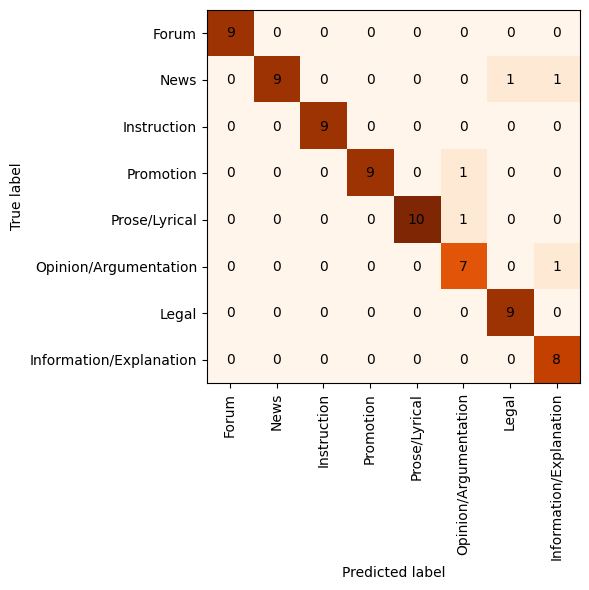

|                         |   precision |   recall |   f1-score |   support |
|:------------------------|------------:|---------:|-----------:|----------:|
| Forum                   |    1        | 1        |   1        |  9        |
| Information/Explanation |    0.8      | 1        |   0.888889 |  8        |
| Instruction             |    1        | 1        |   1        |  9        |
| Legal                   |    0.9      | 1        |   0.947368 |  9        |
| News                    |    1        | 0.818182 |   0.9      | 11        |
| Opinion/Argumentation   |    0.777778 | 0.875    |   0.823529 |  8        |
| Promotion               |    1        | 0.9      |   0.947368 | 10        |
| Prose/Lyrical           |    1        | 0.909091 |   0.952381 | 11        |
| accuracy                |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| macro avg               |    0.934722 | 0.937784 |   0.932442 | 75        |
| weighted avg            |    0.942963 | 0.933333 |   0.93434  

<Figure size 640x480 with 0 Axes>

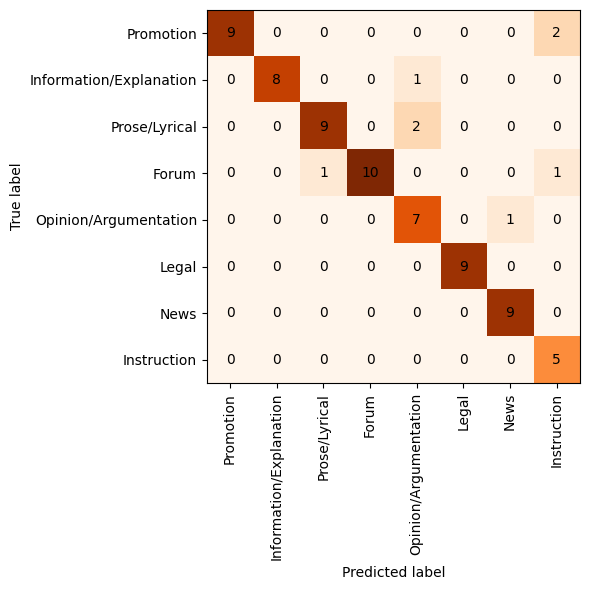

|                         |   precision |   recall |   f1-score |   support |
|:------------------------|------------:|---------:|-----------:|----------:|
| Forum                   |    1        | 0.833333 |   0.909091 | 12        |
| Information/Explanation |    1        | 0.888889 |   0.941176 |  9        |
| Instruction             |    0.625    | 1        |   0.769231 |  5        |
| Legal                   |    1        | 1        |   1        |  9        |
| News                    |    0.9      | 1        |   0.947368 |  9        |
| Opinion/Argumentation   |    0.7      | 0.875    |   0.777778 |  8        |
| Promotion               |    1        | 0.818182 |   0.9      | 11        |
| Prose/Lyrical           |    0.9      | 0.818182 |   0.857143 | 11        |
| accuracy                |    0.891892 | 0.891892 |   0.891892 |  0.891892 |
| macro avg               |    0.890625 | 0.904198 |   0.887723 | 74        |
| weighted avg            |    0.915203 | 0.891892 |   0.895986 

<Figure size 640x480 with 0 Axes>

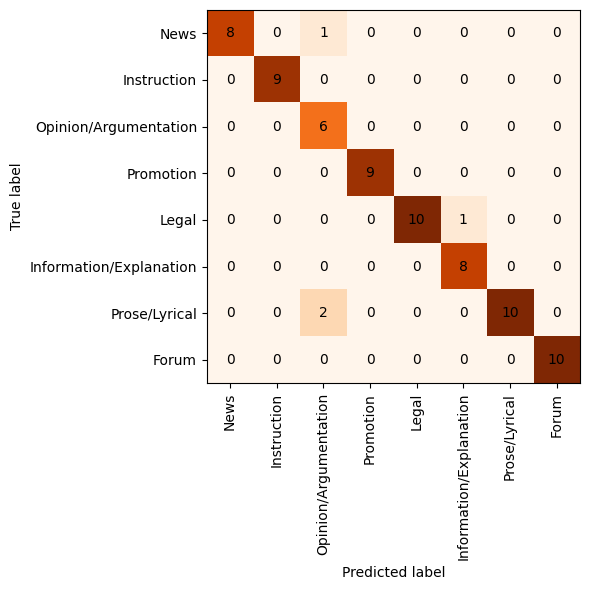

|                         |   precision |   recall |   f1-score |   support |
|:------------------------|------------:|---------:|-----------:|----------:|
| Forum                   |    1        | 1        |   1        | 10        |
| Information/Explanation |    0.888889 | 1        |   0.941176 |  8        |
| Instruction             |    1        | 1        |   1        |  9        |
| Legal                   |    1        | 0.909091 |   0.952381 | 11        |
| News                    |    1        | 0.888889 |   0.941176 |  9        |
| Opinion/Argumentation   |    0.666667 | 1        |   0.8      |  6        |
| Promotion               |    1        | 1        |   1        |  9        |
| Prose/Lyrical           |    1        | 0.833333 |   0.909091 | 12        |
| accuracy                |    0.945946 | 0.945946 |   0.945946 |  0.945946 |
| macro avg               |    0.944444 | 0.953914 |   0.942978 | 74        |
| weighted avg            |    0.960961 | 0.945946 |   0.94845  

<Figure size 640x480 with 0 Axes>

In [15]:
all_results = {}

for corpus in corpora_clean:
    cur_corpus = "CLASSLA.web-{}".format(corpus["corpus"].to_list()[0])
    y_pred = corpus["y_pred"].to_list()
    y_true = corpus["y_true_run2"].to_list()
    labels = list(corpus["y_true_run2"].unique())

    print("Corpus: {}\n".format(cur_corpus))

    results = testing(y_true, y_pred, labels)
    all_results[cur_corpus] = results

## Evaluation of Albanian

In [18]:
# Import the annotated corpus

ann_df = pd.read_json("/home/tajak/Crosslingual-Genre-Bias-Analysis/datasets/genre-samples/CLASSLA-sq-annotated.jsonl", lines=True)
ann_df.shape

(90, 5)

In [19]:
ann_df.head(1)

,id,text,metadata,label,Comments
0,1,"Blog\n\n""I loved you with eternal love.""Jer 31...","{'text_id': 'macocu.sq.1061396', 'domain': 'fj...",[Opinion/Argumentation],[]


In [5]:
# Discard unnecessary columns
ann_df = ann_df[["text","metadata","label"]]

# Rename columns
ann_df.columns = [["translation","metadata","y_true"]]

ann_df.head(3)

,translation,metadata,y_true
0,"Blog\n\n""I loved you with eternal love.""Jer 31...","{'text_id': 'macocu.sq.1061396', 'domain': 'fj...",[Opinion/Argumentation]
1,"The Albanian National Union Front (FBKSH), the...","{'text_id': 'macocu.sq.1408163', 'domain': 'ze...",[Other]
2,Freedom from mistreatment\n\nStudent Rights Co...,"{'text_id': 'macocu.sq.183383', 'domain': 'euk...",[Legal]


In [7]:
# Extract the text ids
text_ids = []

for i in np.array(ann_df.metadata):
	text_ids.append(i[0]["text_id"])

text_ids

['macocu.sq.1061396',
 'macocu.sq.1408163',
 'macocu.sq.183383',
 'macocu.sq.1191613',
 'macocu.sq.1104611',
 'macocu.sq.1049407',
 'macocu.sq.1485180',
 'macocu.sq.1411292',
 'macocu.sq.1340549',
 'macocu.sq.1049425',
 'macocu.sq.1366768',
 'macocu.sq.625662',
 'macocu.sq.910913',
 'macocu.sq.1281255',
 'macocu.sq.1160383',
 'macocu.sq.1588366',
 'macocu.sq.1684290',
 'macocu.sq.57195',
 'macocu.sq.772190',
 'macocu.sq.1622172',
 'macocu.sq.293086',
 'macocu.sq.676597',
 'macocu.sq.1630286',
 'macocu.sq.341423',
 'macocu.sq.1564538',
 'macocu.sq.1056906',
 'macocu.sq.1259287',
 'macocu.sq.386123',
 'macocu.sq.1543035',
 'macocu.sq.488342',
 'macocu.sq.1466388',
 'macocu.sq.646269',
 'macocu.sq.1285908',
 'macocu.sq.1053950',
 'macocu.sq.171654',
 'macocu.sq.439446',
 'macocu.sq.299115',
 'macocu.sq.451531',
 'macocu.sq.504047',
 'macocu.sq.941483',
 'macocu.sq.223150',
 'macocu.sq.1554463',
 'macocu.sq.1520300',
 'macocu.sq.293573',
 'macocu.sq.258310',
 'macocu.sq.495570',
 'macocu.s

In [8]:
# Add the ids to the ann_df

ann_df["text_id"] = text_ids

ann_df

,translation,metadata,y_true,text_id
0,"Blog\n\n""I loved you with eternal love.""Jer 31...","{'text_id': 'macocu.sq.1061396', 'domain': 'fj...",[Opinion/Argumentation],macocu.sq.1061396
1,"The Albanian National Union Front (FBKSH), the...","{'text_id': 'macocu.sq.1408163', 'domain': 'ze...",[Other],macocu.sq.1408163
2,Freedom from mistreatment\n\nStudent Rights Co...,"{'text_id': 'macocu.sq.183383', 'domain': 'euk...",[Legal],macocu.sq.183383
3,"A millimeter away from goal, ""Var"" becomes nig...","{'text_id': 'macocu.sq.1191613', 'domain': 'sp...",[News],macocu.sq.1191613
4,What do you think?\n\nQuestion: My mother has ...,"{'text_id': 'macocu.sq.1104611', 'domain': 'bu...",[Forum],macocu.sq.1104611
...,...,...,...,...
85,Interview newspapers\n\nInterview newspapers\n...,"{'text_id': 'macocu.sq.915191', 'domain': 'int...",[Other],macocu.sq.915191
86,"Alexandra Stan and her superhiti ""Mr.Axobeat""\...","{'text_id': 'macocu.sq.1060790', 'domain': 'ra...",[Information/Explanation],macocu.sq.1060790
87,The operation of Edvin Czech's dump mask is co...,"{'text_id': 'macocu.sq.581026', 'domain': 'nov...",[Opinion/Argumentation],macocu.sq.581026
88,"Is it permissible to say ""Al Hamdu lilah"" when...","{'text_id': 'macocu.sq.1118037', 'domain': 'bu...",[Forum],macocu.sq.1118037


In [9]:
# Import the genre sample with gold labels
sample = pd.read_json("datasets/CLASSLA-web.sq.1.0.-translated-genre-sample.jsonl", lines=True)
sample.head()

,text_id,genre,text_length,domain,text,translation
0,macocu.sq.1061396,Opinion/Argumentation,341,fjalaejetes.org,Blog\n\n“Unë të kam dashur me një dashuri të p...,"Blog\n\n""I loved you with eternal love.""Jer 31..."
1,macocu.sq.1408163,Promotion,231,zemrashqiptare.net,"Fronti Bashkimit Kombëtar Shqiptar (FBKSH), or...","The Albanian National Union Front (FBKSH), the..."
2,macocu.sq.183383,Legal,140,eukos.org,Liria nga keqtrajtimi\n\nKonventa e të Drejtav...,Freedom from mistreatment\n\nStudent Rights Co...
3,macocu.sq.1191613,News,115,sportekspres.com,"Një milimetër larg golit, “VAR” bëhet makth pë...","A millimeter away from goal, ""Var"" becomes nig..."
4,macocu.sq.1104611,Other,342,burimijetes.com,Ç’MENDONI JU?\n\nPyetje: Nena ime ka pare ende...,What do you think?\n\nQuestion: My mother has ...


In [13]:
# Correct some problems with multiple columns which prevent merging the dataframes
sample.columns = sample.columns.map(''.join)
sample = sample.reset_index()

ann_df.columns = ann_df.columns.map(''.join)
ann_df = ann_df.reset_index()

In [16]:
# Merge based on translated text

df_sq = pd.merge(sample, ann_df, on="text_id", how="outer")

df_sq.head()

,level_0,index_x,text_id,genre,text_length,domain,text,translation_x,index_y,translation_y,metadata,y_true
0,0,0,macocu.sq.1061396,Opinion/Argumentation,341,fjalaejetes.org,Blog\n\n“Unë të kam dashur me një dashuri të p...,"Blog\n\n""I loved you with eternal love.""Jer 31...",0,"Blog\n\n""I loved you with eternal love.""Jer 31...","{'text_id': 'macocu.sq.1061396', 'domain': 'fj...",[Opinion/Argumentation]
1,1,1,macocu.sq.1408163,Promotion,231,zemrashqiptare.net,"Fronti Bashkimit Kombëtar Shqiptar (FBKSH), or...","The Albanian National Union Front (FBKSH), the...",1,"The Albanian National Union Front (FBKSH), the...","{'text_id': 'macocu.sq.1408163', 'domain': 'ze...",[Other]
2,2,2,macocu.sq.183383,Legal,140,eukos.org,Liria nga keqtrajtimi\n\nKonventa e të Drejtav...,Freedom from mistreatment\n\nStudent Rights Co...,2,Freedom from mistreatment\n\nStudent Rights Co...,"{'text_id': 'macocu.sq.183383', 'domain': 'euk...",[Legal]
3,3,3,macocu.sq.1191613,News,115,sportekspres.com,"Një milimetër larg golit, “VAR” bëhet makth pë...","A millimeter away from goal, ""Var"" becomes nig...",3,"A millimeter away from goal, ""Var"" becomes nig...","{'text_id': 'macocu.sq.1191613', 'domain': 'sp...",[News]
4,4,4,macocu.sq.1104611,Other,342,burimijetes.com,Ç’MENDONI JU?\n\nPyetje: Nena ime ka pare ende...,What do you think?\n\nQuestion: My mother has ...,4,What do you think?\n\nQuestion: My mother has ...,"{'text_id': 'macocu.sq.1104611', 'domain': 'bu...",[Forum]


In [20]:
df_sq.head(2)

,text_id,y_pred,text_length,domain,text,translation,metadata,y_true
0,macocu.sq.1061396,Opinion/Argumentation,341,fjalaejetes.org,Blog\n\n“Unë të kam dashur me një dashuri të p...,"Blog\n\n""I loved you with eternal love.""Jer 31...","{'text_id': 'macocu.sq.1061396', 'domain': 'fj...",[Opinion/Argumentation]
1,macocu.sq.1408163,Promotion,231,zemrashqiptare.net,"Fronti Bashkimit Kombëtar Shqiptar (FBKSH), or...","The Albanian National Union Front (FBKSH), the...","{'text_id': 'macocu.sq.1408163', 'domain': 'ze...",[Other]


In [ ]:
# Keep only relevant columns
df_sq = df_sq[['text_id', 'genre', 'text_length', 'domain', 'text', 'translation_y', 'metadata', 'y_true']]

# Rename the columns
df_sq = df_sq.rename(columns={"genre":"y_pred", "translation_y":"translation"})

df_sq.head(2)

In [25]:
# Change y_true labels
df_sq["y_true"] = df_sq["y_true"].apply(lambda x:x[0])

df_sq

,text_id,y_pred,text_length,domain,text,translation,metadata,y_true
0,macocu.sq.1061396,Opinion/Argumentation,341,fjalaejetes.org,Blog\n\n“Unë të kam dashur me një dashuri të p...,"Blog\n\n""I loved you with eternal love.""Jer 31...","{'text_id': 'macocu.sq.1061396', 'domain': 'fj...",Opinion/Argumentation
1,macocu.sq.1408163,Promotion,231,zemrashqiptare.net,"Fronti Bashkimit Kombëtar Shqiptar (FBKSH), or...","The Albanian National Union Front (FBKSH), the...","{'text_id': 'macocu.sq.1408163', 'domain': 'ze...",Other
2,macocu.sq.183383,Legal,140,eukos.org,Liria nga keqtrajtimi\n\nKonventa e të Drejtav...,Freedom from mistreatment\n\nStudent Rights Co...,"{'text_id': 'macocu.sq.183383', 'domain': 'euk...",Legal
3,macocu.sq.1191613,News,115,sportekspres.com,"Një milimetër larg golit, “VAR” bëhet makth pë...","A millimeter away from goal, ""Var"" becomes nig...","{'text_id': 'macocu.sq.1191613', 'domain': 'sp...",News
4,macocu.sq.1104611,Other,342,burimijetes.com,Ç’MENDONI JU?\n\nPyetje: Nena ime ka pare ende...,What do you think?\n\nQuestion: My mother has ...,"{'text_id': 'macocu.sq.1104611', 'domain': 'bu...",Forum
...,...,...,...,...,...,...,...,...
85,macocu.sq.915191,Forum,235,intervista.al,Gazeta Intervista\n\nGazeta Intervista\n\nPas ...,Interview newspapers\n\nInterview newspapers\n...,"{'text_id': 'macocu.sq.915191', 'domain': 'int...",Other
86,macocu.sq.1060790,Information/Explanation,121,radioiliria.net,Aleksandra Stan dhe superhiti i saj “Mr.Saxobe...,"Alexandra Stan and her superhiti ""Mr.Axobeat""\...","{'text_id': 'macocu.sq.1060790', 'domain': 'ra...",Information/Explanation
87,macocu.sq.581026,Opinion/Argumentation,437,novamedia.al,Përfundon operacioni i larjes se halesë se Edv...,The operation of Edvin Czech's dump mask is co...,"{'text_id': 'macocu.sq.581026', 'domain': 'nov...",Opinion/Argumentation
88,macocu.sq.1118037,Other,223,burimijetes.com,A LEJOHET TË THEM “EL HAMDU LILAH” KUR TESHTIJ...,"Is it permissible to say ""Al Hamdu lilah"" when...","{'text_id': 'macocu.sq.1118037', 'domain': 'bu...",Forum


In [26]:
# Save the corpus
df_sq.to_csv("CLASSLA-sq-first-annotation-run.csv")

## Analyse Albanian files

In [21]:
df_sq = pd.read_csv("/home/tajak/Crosslingual-Genre-Bias-Analysis/datasets/genre-samples/CLASSLA-sq-first-annotation-run.csv", index_col = 0)
df_sq.head(2)

,text_id,y_pred,text_length,domain,text,translation,metadata,y_true
0,macocu.sq.1061396,Opinion/Argumentation,341,fjalaejetes.org,Blog\n\n“Unë të kam dashur me një dashuri të p...,"Blog\n\n""I loved you with eternal love.""Jer 31...","{'text_id': 'macocu.sq.1061396', 'domain': 'fj...",Opinion/Argumentation
1,macocu.sq.1408163,Promotion,231,zemrashqiptare.net,"Fronti Bashkimit Kombëtar Shqiptar (FBKSH), or...","The Albanian National Union Front (FBKSH), the...","{'text_id': 'macocu.sq.1408163', 'domain': 'ze...",Other


In [22]:
# Analyze number of problematic texts
print(df_sq["y_true"].value_counts().to_markdown())
print("\n")
print(df_sq["y_true"].value_counts(normalize="True").to_markdown())
print("\n--------------------------------------\n\n")

| y_true                  |   count |
|:------------------------|--------:|
| Information/Explanation |      15 |
| Opinion/Argumentation   |      11 |
| Prose/Lyrical           |      11 |
| Forum                   |      10 |
| Legal                   |       9 |
| Instruction             |       9 |
| News                    |       8 |
| Promotion               |       8 |
| Other                   |       4 |
| Multiple texts          |       3 |
| Incomprehensible        |       2 |


| y_true                  |   proportion |
|:------------------------|-------------:|
| Information/Explanation |    0.166667  |
| Opinion/Argumentation   |    0.122222  |
| Prose/Lyrical           |    0.122222  |
| Forum                   |    0.111111  |
| Legal                   |    0.1       |
| Instruction             |    0.1       |
| News                    |    0.0888889 |
| Promotion               |    0.0888889 |
| Other                   |    0.0444444 |
| Multiple texts          |    

In [23]:
# Filter out "Other" instances and "Problematic" instances so that we will do analysis on clear examples only
df_test_clean = df_sq[df_sq["y_pred"] != "Other"]
df_test_clean = df_test_clean[df_test_clean["y_true"] != "Multiple texts"]
df_test_clean = df_test_clean[df_test_clean["y_true"] != "Incomprehensible"]
df_test_clean = df_test_clean[df_test_clean["y_true"] != "Other"]

df_test_clean.describe(include="all")

,text_id,y_pred,text_length,domain,text,translation,metadata,y_true
count,73,73,73.000000,73,73,73,73,73
unique,73,8,NaN,62,73,73,73,8
top,macocu.sq.1061396,Opinion/Argumentation,NaN,fjalaejetes.org,Blog\n\n“Unë të kam dashur me një dashuri të p...,"Blog\n\n""I loved you with eternal love.""Jer 31...","{'text_id': 'macocu.sq.1061396', 'domain': 'fj...",Information/Explanation
freq,1,10,NaN,3,1,1,1,13
mean,NaN,NaN,220.479452,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,120.915961,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,75.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,115.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,188.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,303.000000,NaN,NaN,NaN,NaN,NaN


In [24]:
# Analyze y_pred labels in cleaned corpora
print(df_test_clean["y_pred"].value_counts().to_markdown())
print("\n--------------------------------------\n\n")
print(df_test_clean["y_pred"].value_counts(normalize="True").to_markdown())


| y_pred                  |   count |
|:------------------------|--------:|
| Opinion/Argumentation   |      10 |
| Legal                   |      10 |
| News                    |      10 |
| Instruction             |      10 |
| Prose/Lyrical           |       9 |
| Promotion               |       9 |
| Information/Explanation |       8 |
| Forum                   |       7 |

--------------------------------------


| y_pred                  |   proportion |
|:------------------------|-------------:|
| Opinion/Argumentation   |    0.136986  |
| Legal                   |    0.136986  |
| News                    |    0.136986  |
| Instruction             |    0.136986  |
| Prose/Lyrical           |    0.123288  |
| Promotion               |    0.123288  |
| Information/Explanation |    0.109589  |
| Forum                   |    0.0958904 |


Macro f1: 0.865, Micro f1: 0.863
Accuracy: 0.863


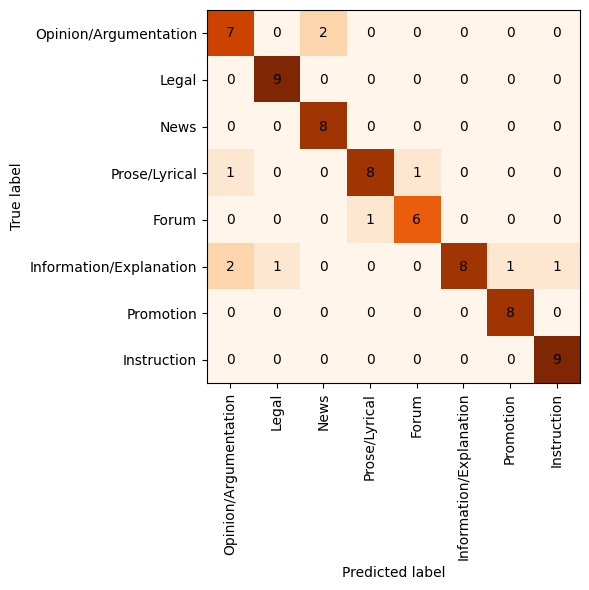

|                         |   precision |   recall |   f1-score |   support |
|:------------------------|------------:|---------:|-----------:|----------:|
| Forum                   |    0.857143 | 0.857143 |   0.857143 |  7        |
| Information/Explanation |    1        | 0.615385 |   0.761905 | 13        |
| Instruction             |    0.9      | 1        |   0.947368 |  9        |
| Legal                   |    0.9      | 1        |   0.947368 |  9        |
| News                    |    0.8      | 1        |   0.888889 |  8        |
| Opinion/Argumentation   |    0.7      | 0.777778 |   0.736842 |  9        |
| Promotion               |    0.888889 | 1        |   0.941176 |  8        |
| Prose/Lyrical           |    0.888889 | 0.8      |   0.842105 | 10        |
| accuracy                |    0.863014 | 0.863014 |   0.863014 |  0.863014 |
| macro avg               |    0.866865 | 0.881288 |   0.86535  | 73        |
| weighted avg            |    0.875342 | 0.863014 |   0.858227 

<Figure size 640x480 with 0 Axes>

In [25]:
y_pred = df_test_clean["y_pred"].to_list()
y_true = df_test_clean["y_true"].to_list()
labels = list(df_test_clean["y_true"].unique())

results = testing(y_true, y_pred, labels)

## Evaluation of run 1

In [3]:
# Import the test file
df_test = pd.read_csv("sample-evaluation-annotation.tsv", sep="\t")
df_test.head(2)

,id,text_id,url,domain,y_pred,text,text_length,translation,y_true,comment
0,403,CLASSLA-web.mk.40729,https://okno.mk/node/63839,okno.mk,Opinion/Argumentation,Од будалетинка до диктаторче ...,285,From a fool to dictator Gruevski was a reforme...,Opinion/Argumentation,Or News
1,2249,CLASSLA-web.hr.225355,http://www.gkc-petrinja.hr/biblosam/preglednas...,gkc-petrinja.hr,Prose/Lyrical,U namjeri da se prisjeti tko je zapravo i što ...,98,In order to remember who he really was and wha...,Prose/Lyrical,NaN


In [4]:
df_test.describe(include="all")

,id,text_id,url,domain,y_pred,text,text_length,translation,y_true,comment
count,270.000000,270,270,270,270,270,270.000000,270,270,39
unique,NaN,270,270,226,9,270,NaN,270,10,19
top,NaN,CLASSLA-web.mk.40729,https://okno.mk/node/63839,besedilo.si,Opinion/Argumentation,Од будалетинка до диктаторче ...,NaN,From a fool to dictator Gruevski was a reforme...,Promotion,Not a coherent text
freq,NaN,1,1,5,30,1,NaN,1,40,14
mean,52800.066667,NaN,NaN,NaN,NaN,NaN,213.051852,NaN,NaN,NaN
std,28044.579222,NaN,NaN,NaN,NaN,NaN,117.241518,NaN,NaN,NaN
min,403.000000,NaN,NaN,NaN,NaN,NaN,64.000000,NaN,NaN,NaN
25%,29918.000000,NaN,NaN,NaN,NaN,NaN,117.250000,NaN,NaN,NaN
50%,53315.500000,NaN,NaN,NaN,NaN,NaN,182.500000,NaN,NaN,NaN
75%,77339.250000,NaN,NaN,NaN,NaN,NaN,277.750000,NaN,NaN,NaN


In [5]:
# Separate the test file into three dfs, based on the language of the corpora
df_test["corpus"] = df_test["text_id"].apply(lambda x:x.split(".")[1])

df_test.corpus.value_counts()

corpus
mk    90
hr    90
sl    90
Name: count, dtype: int64

In [6]:
mk_df = df_test[df_test["corpus"] == "mk"]
hr_df = df_test[df_test["corpus"] == "hr"]
sl_df = df_test[df_test["corpus"] == "sl"]

corpora = [mk_df, hr_df, sl_df]

mk_df.head(3)

,id,text_id,url,domain,y_pred,text,text_length,translation,y_true,comment,corpus
0,403,CLASSLA-web.mk.40729,https://okno.mk/node/63839,okno.mk,Opinion/Argumentation,Од будалетинка до диктаторче ...,285,From a fool to dictator Gruevski was a reforme...,Opinion/Argumentation,Or News,mk
4,3836,CLASSLA-web.mk.378842,http://arhiva.sdsm.org.mk/print.aspx?eventId=1...,arhiva.sdsm.org.mk,Other,Да изготвиме и потпишеме декларација со која н...,217,To prepare and sign a declaration that will st...,Opinion/Argumentation,NaN,mk
5,4330,CLASSLA-web.mk.425293,https://www.brif.mk/namalena-pobaruvachkata-za...,brif.mk,News,"Намалена побарувачката за станови, укажуваат а...",152,"Demand for housing decreased, real estate agen...",News,NaN,mk


In [7]:
df_test.columns

Index(['id', 'text_id', 'url', 'domain', 'y_pred', 'text', 'text_length',
       'translation', 'y_true', 'comment', 'corpus'],
      dtype='object')

In [8]:
# Analyze number of problematic texts
for corpus in corpora:
    print("Corpus: {}\n".format(corpus["corpus"].to_list()[0]))
    print(corpus["y_true"].value_counts().to_markdown())
    print("\n")
    print(corpus["y_true"].value_counts(normalize="True").to_markdown())
    print("\n--------------------------------------\n\n")

Corpus: mk

| y_true                  |   count |
|:------------------------|--------:|
| Opinion/Argumentation   |      15 |
| News                    |      11 |
| Promotion               |      11 |
| Legal                   |      10 |
| Prose/Lyrical           |      10 |
| Forum                   |       9 |
| Instruction             |       9 |
| Problematic             |       7 |
| Information/Explanation |       7 |
| Other                   |       1 |


| y_true                  |   proportion |
|:------------------------|-------------:|
| Opinion/Argumentation   |    0.166667  |
| News                    |    0.122222  |
| Promotion               |    0.122222  |
| Legal                   |    0.111111  |
| Prose/Lyrical           |    0.111111  |
| Forum                   |    0.1       |
| Instruction             |    0.1       |
| Problematic             |    0.0777778 |
| Information/Explanation |    0.0777778 |
| Other                   |    0.0111111 |

-------------

In [9]:
# Filter out "Other" instances and "Problematic" instances so that we will do analysis on clear examples only
df_test_clean = df_test[df_test["y_pred"] != "Other"]
df_test_clean = df_test_clean[df_test_clean["y_true"] != "Problematic"]

df_test_clean.describe(include="all")

,id,text_id,url,domain,y_pred,text,text_length,translation,y_true,comment,corpus
count,225.000000,225,225,225,225,225,225.000000,225,225,13,225
unique,NaN,225,225,191,8,225,NaN,225,8,11,3
top,NaN,CLASSLA-web.mk.40729,https://okno.mk/node/63839,forum.carclub.mk,Opinion/Argumentation,Од будалетинка до диктаторче ...,NaN,From a fool to dictator Gruevski was a reforme...,Promotion,Or News,mk
freq,NaN,1,1,5,30,1,NaN,1,32,2,76
mean,54420.755556,NaN,NaN,NaN,NaN,NaN,213.044444,NaN,NaN,NaN,NaN
std,27553.277543,NaN,NaN,NaN,NaN,NaN,115.299562,NaN,NaN,NaN,NaN
min,403.000000,NaN,NaN,NaN,NaN,NaN,64.000000,NaN,NaN,NaN,NaN
25%,32797.000000,NaN,NaN,NaN,NaN,NaN,121.000000,NaN,NaN,NaN,NaN
50%,55640.000000,NaN,NaN,NaN,NaN,NaN,187.000000,NaN,NaN,NaN,NaN
75%,78461.000000,NaN,NaN,NaN,NaN,NaN,270.000000,NaN,NaN,NaN,NaN


In [10]:
# Create clean subcorpora
mk_df_clean = df_test_clean[df_test_clean["corpus"] == "mk"]
hr_df_clean = df_test_clean[df_test_clean["corpus"] == "hr"]
sl_df_clean = df_test_clean[df_test_clean["corpus"] == "sl"]

corpora_clean = [mk_df_clean, hr_df_clean, sl_df_clean]

mk_df_clean.head(3)

,id,text_id,url,domain,y_pred,text,text_length,translation,y_true,comment,corpus
0,403,CLASSLA-web.mk.40729,https://okno.mk/node/63839,okno.mk,Opinion/Argumentation,Од будалетинка до диктаторче ...,285,From a fool to dictator Gruevski was a reforme...,Opinion/Argumentation,Or News,mk
5,4330,CLASSLA-web.mk.425293,https://www.brif.mk/namalena-pobaruvachkata-za...,brif.mk,News,"Намалена побарувачката за станови, укажуваат а...",152,"Demand for housing decreased, real estate agen...",News,NaN,mk
11,6270,CLASSLA-web.mk.609997,http://kiselavoda.gov.mk/index.php/naslovna/no...,kiselavoda.gov.mk,Legal,-Усвојување на Записникот од 27-та пленарна се...,131,-Uagement of the minutes of the 27th plenary s...,Legal,NaN,mk


In [11]:
# Analyze y_pred labels in cleaned corpora
for corpus in corpora_clean:
    print("Corpus: {}\n".format(corpus["corpus"].to_list()[0]))
    print(corpus["y_pred"].value_counts().to_markdown())
    print("\n")
    print(corpus["y_pred"].value_counts(normalize="True").to_markdown())
    print("\n--------------------------------------\n\n")

Corpus: mk

| y_pred                  |   count |
|:------------------------|--------:|
| Opinion/Argumentation   |      10 |
| Legal                   |      10 |
| Information/Explanation |      10 |
| Prose/Lyrical           |      10 |
| News                    |       9 |
| Promotion               |       9 |
| Forum                   |       9 |
| Instruction             |       9 |


| y_pred                  |   proportion |
|:------------------------|-------------:|
| Opinion/Argumentation   |     0.131579 |
| Legal                   |     0.131579 |
| Information/Explanation |     0.131579 |
| Prose/Lyrical           |     0.131579 |
| News                    |     0.118421 |
| Promotion               |     0.118421 |
| Forum                   |     0.118421 |
| Instruction             |     0.118421 |

--------------------------------------


Corpus: hr

| y_pred                  |   count |
|:------------------------|--------:|
| Prose/Lyrical           |      10 |
| News  

Corpus: CLASSLA.web-mk

Macro f1: 0.933, Micro f1: 0.934
Accuracy: 0.934


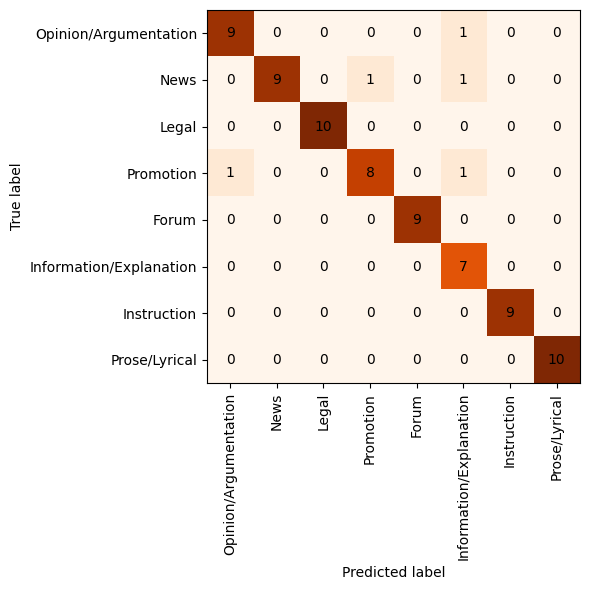

|                         |   precision |   recall |   f1-score |   support |
|:------------------------|------------:|---------:|-----------:|----------:|
| Opinion/Argumentation   |    1        | 1        |   1        |  9        |
| News                    |    0.7      | 1        |   0.823529 |  7        |
| Legal                   |    1        | 1        |   1        |  9        |
| Promotion               |    1        | 1        |   1        | 10        |
| Forum                   |    1        | 0.818182 |   0.9      | 11        |
| Information/Explanation |    0.9      | 0.9      |   0.9      | 10        |
| Instruction             |    0.888889 | 0.8      |   0.842105 | 10        |
| Prose/Lyrical           |    1        | 1        |   1        | 10        |
| accuracy                |    0.934211 | 0.934211 |   0.934211 |  0.934211 |
| macro avg               |    0.936111 | 0.939773 |   0.933204 | 76        |
| weighted avg            |    0.944591 | 0.934211 |   0.935339 

<Figure size 640x480 with 0 Axes>

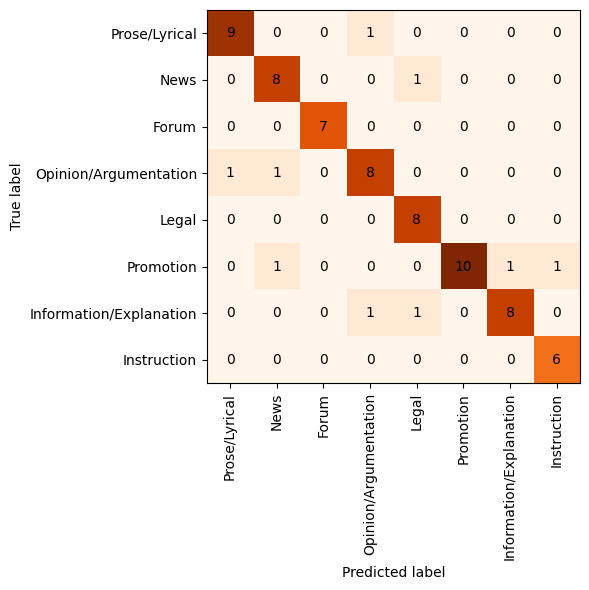

|                         |   precision |   recall |   f1-score |   support |
|:------------------------|------------:|---------:|-----------:|----------:|
| Prose/Lyrical           |    1        | 1        |   1        |  7        |
| News                    |    0.888889 | 0.8      |   0.842105 | 10        |
| Forum                   |    0.857143 | 1        |   0.923077 |  6        |
| Opinion/Argumentation   |    0.8      | 1        |   0.888889 |  8        |
| Legal                   |    0.8      | 0.888889 |   0.842105 |  9        |
| Promotion               |    0.8      | 0.8      |   0.8      | 10        |
| Information/Explanation |    1        | 0.769231 |   0.869565 | 13        |
| Instruction             |    0.9      | 0.9      |   0.9      | 10        |
| accuracy                |    0.876712 | 0.876712 |   0.876712 |  0.876712 |
| macro avg               |    0.880754 | 0.894765 |   0.883218 | 73        |
| weighted avg            |    0.885366 | 0.876712 |   0.876081 

<Figure size 640x480 with 0 Axes>

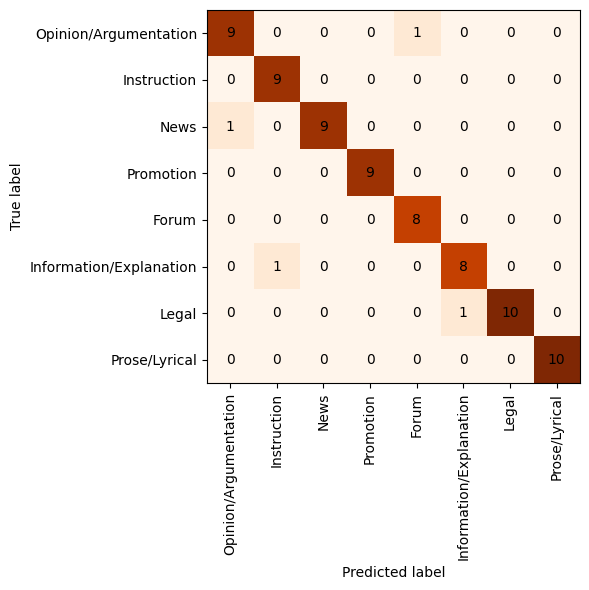

|                         |   precision |   recall |   f1-score |   support |
|:------------------------|------------:|---------:|-----------:|----------:|
| Opinion/Argumentation   |    0.888889 | 1        |   0.941176 |  8        |
| Instruction             |    0.888889 | 0.888889 |   0.888889 |  9        |
| News                    |    0.9      | 1        |   0.947368 |  9        |
| Promotion               |    1        | 0.909091 |   0.952381 | 11        |
| Forum                   |    1        | 0.9      |   0.947368 | 10        |
| Information/Explanation |    0.9      | 0.9      |   0.9      | 10        |
| Legal                   |    1        | 1        |   1        |  9        |
| Prose/Lyrical           |    1        | 1        |   1        | 10        |
| accuracy                |    0.947368 | 0.947368 |   0.947368 |  0.947368 |
| macro avg               |    0.947222 | 0.949747 |   0.947148 | 76        |
| weighted avg            |    0.950146 | 0.947368 |   0.947442 

<Figure size 640x480 with 0 Axes>

In [12]:
all_results = {}

for corpus in corpora_clean:
    cur_corpus = "CLASSLA.web-{}".format(corpus["corpus"].to_list()[0])
    y_pred = corpus["y_pred"].to_list()
    y_true = corpus["y_true"].to_list()
    labels = list(corpus["y_true"].unique())

    print("Corpus: {}\n".format(cur_corpus))

    results = testing(y_true, y_pred, labels)
    all_results[cur_corpus] = results